In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl
import matplotlib.colors as pltc
import geopandas
import mapclassify
mpl.rcParams['pdf.fonttype'] = 42

ModuleNotFoundError: No module named 'mapclassify'

In [ ]:
df = pd.read_csv("../data/pnwNP_StatsLocations.csv")
df = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.dec_long_va,df.dec_lat_va)).set_crs('epsg:4269')

In [ ]:
pnw_hydro = geopandas.read_file("../data/mapping/pnw_hydrologic_landscape_class/PNW Hydrologic Landscape Class.shp")
pnw_hydro_repro = pnw_hydro.to_crs(epsg=4269)
pnw_hydro_repro.CLASS = pnw_hydro['CLASS'].astype(str).str[0:1]

states = geopandas.read_file("../data/mapping/cb_2018_us_state_5m/cb_2018_us_state_5m.shp")
states = states.to_crs(epsg=4269)
st = ["Idaho",'Washington','Oregon']
states = states[states["NAME"].isin(st)]

rivs = geopandas.read_file("../data/mapping/rs16my07/")
rivs = rivs.set_crs(epsg=4269)
rivs = geopandas.clip(rivs, states)
rivs = rivs[rivs["STRAHLER"]>=4]

df = geopandas.clip(df, states)

In [ ]:
plt.rcParams.update({'font.size': 18})


color_map = {'W': 'lightskyblue',
          'V': 'dodgerblue' ,
          'D': 'navajowhite',
          'M': 'papayawhip',
          'S': 'salmon' ,
          'A': 'orangered' ,
          'B': 'hotpink' }

f,ax = plt.subplots(figsize=(15, 15))

pnw_hydro_repro.plot(ax=ax,legend=True,color = pnw_hydro_repro['CLASS'].map(color_map),alpha= .5)
states.plot(ax=ax,facecolor="none",edgecolor = "black")
rivs.plot(ax=ax,
          alpha = .5,
          edgecolor='darkblue')
tmp = df[df["propZero"]>0]
tmp.plot(ax=ax,
        markersize=100,
        alpha = .5,
        edgecolor = "black",
        legend=True,
        scheme="user_defined",
        cmap="viridis",
        classification_kwds={'bins':[.1,.3, .5, .7]},
        column='propZero')

# ax.arrow(-112, 48, 0, 0.75, length_includes_head=True,
#           head_width=0.4, head_length=0.6, overhang=.25, facecolor='k')
# ax.text(x=-112.2, y=48.8, s='N', fontsize=30)
ax.set_xlabel("Longitude (decDeg)")
ax.set_ylabel("Latitude (decDeg)")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_title('Proportion of Zero Flow Readings')
# plt.colorbar(tmp, ax=ax)

# cx.add_basemap(ax ,reset_extent= False,zoom=9,source=cx.providers.OpenStreetMap.Mapnik)

f.savefig('../docs/AllGagesMap_PropZero.png',dpi=600)
# f.savefig('../docs/AllGagesMap_PropZero.pdf')

NameError: name 'plt' is not defined

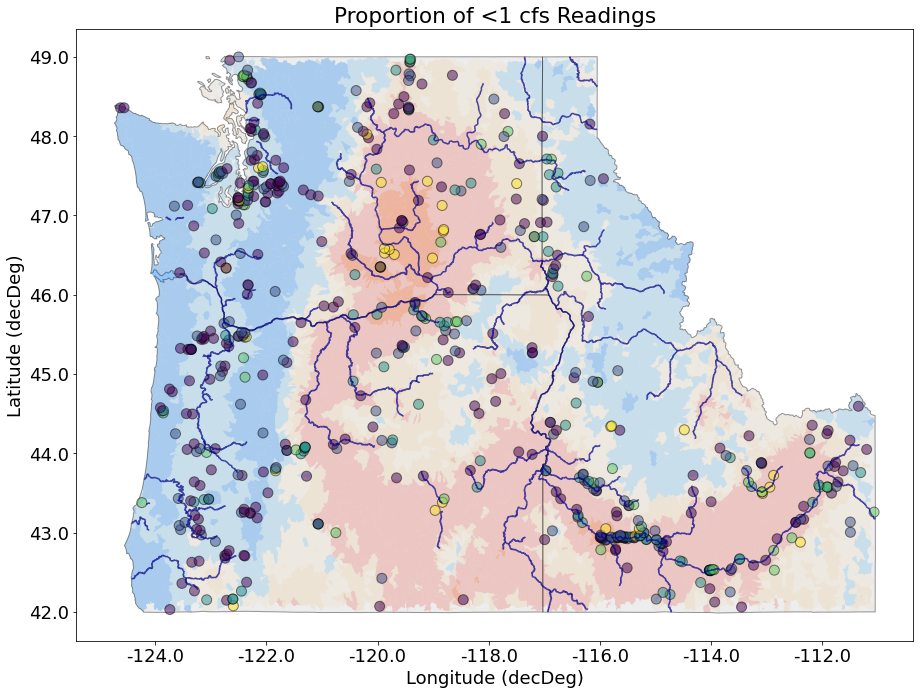

In [ ]:
plt.rcParams.update({'font.size': 18})


color_map = {'W': 'lightskyblue',
          'V': 'dodgerblue' ,
          'D': 'navajowhite',
          'M': 'papayawhip',
          'S': 'salmon' ,
          'A': 'orangered' ,
          'B': 'hotpink' }

f,ax = plt.subplots(figsize=(15, 15))

pnw_hydro_repro.plot(ax=ax,legend=True,color = pnw_hydro_repro['CLASS'].map(color_map),alpha= .5)
states.plot(ax=ax,facecolor="lightgrey",edgecolor = "black",alpha=.4)
rivs.plot(ax=ax,
          alpha = .7,
          edgecolor='darkblue')
# tt.plot(ax=ax,markersize=140,color = 'black', alpha = .6)
df.plot(ax=ax,
        markersize=100,
        alpha = .5,
        edgecolor = "black",
#         legend=True,
#         scheme="EqualInterval",
#         scheme="HeadTailBreaks",
        scheme="user_defined",
        cmap="viridis",
#         classification_kwds={'bins':[.05,.1,.15,.2,.25, .3, .5, .7]},
        classification_kwds={'bins':[.1,.3, .5, .7]},
        column='propOne')

# ax.arrow(-112, 48, 0, 0.75, length_includes_head=True,
#           head_width=0.4, head_length=0.6, overhang=.25, facecolor='k')
# ax.text(x=-112.2, y=48.8, s='N', fontsize=30)
ax.set_xlabel("Longitude (decDeg)")
ax.set_ylabel("Latitude (decDeg)")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_title('Proportion of <1 cfs Readings')


f.savefig('../docs/AllGagesMap_PropOne_woLeg.png',dpi=600)
# f.savefig('../docs/Gages2_PNW.pdf')

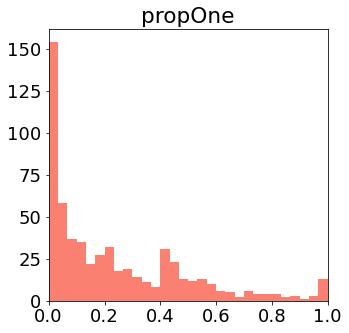

In [ ]:
f,ax = plt.subplots(figsize=(5, 5))
df.hist(ax = ax,
        column = 'propOne',
        bins = 30,
        grid=False,
       color = "salmon")
ax.set(xlim=(0,1))
# plt.savefig("../docs/Allpnw_PropOneHist.png",dpi=600)
plt.savefig("../docs/Allpnw_PropOneHist.pdf")

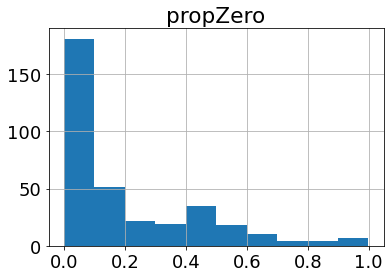

In [ ]:
ax = tmp.hist(column = 'propZero')

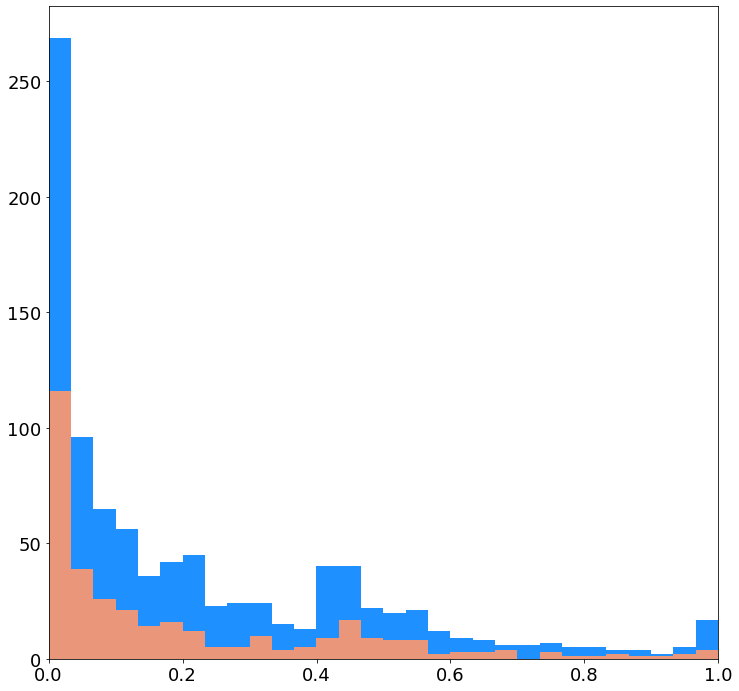

In [ ]:
f,ax = plt.subplots(figsize=(12, 12))
plt.hist(x = [tmp['propZero'],df['propOne']],
        bins = 30,
       color = ["darksalmon",'dodgerblue'],
        histtype = "barstacked")
ax.set(xlim=(0,1))
# plt.savefig("../docs/Allpnw_StackedPropHist.png",dpi=600)
plt.savefig("../docs/Allpnw_StackedPropHist.pdf")